<a href="https://colab.research.google.com/github/gabriel51israel/DeepLearning/blob/master/CNN_AlexNet_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras 

In [75]:
from keras.datasets import mnist
from keras.layers import Dense,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.models import Sequential


In [67]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [6]:
print("Dimension of X_train data: ",X_train.shape)
print("Dimension of y_train data: ",y_train.shape)
print("Dimension of X_test data: ",X_test.shape)
print("Dimension of y_test data: ",y_test.shape)

Dimension of X_train data:  (60000, 28, 28)
Dimension of y_train data:  (60000,)
Dimension of X_test data:  (10000, 28, 28)
Dimension of y_test data:  (10000,)


In [68]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [69]:
#Normalize the img size
y_train = y_train/255 
y_test  = y_test/255

In [25]:
print("Dimension of X_train data: ",X_train.shape)
print("Dimension of y_train data: ",y_train.shape)
print("Dimension of X_test data: ",X_test.shape)
print("Dimension of y_test data: ",y_test.shape)

Dimension of X_train data:  (60000, 28, 28, 1)
Dimension of y_train data:  (60000,)
Dimension of X_test data:  (10000, 28, 28, 1)
Dimension of y_test data:  (10000,)


In [70]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [71]:
#print("Dimension of X_train data: ",X_train.shape)
print("Dimension of y_train data: ",y_train.shape)
#print("Dimension of X_test data: ",X_test.shape)
print("Dimension of y_test data: ",y_test.shape)

Dimension of y_train data:  (60000, 10)
Dimension of y_test data:  (10000, 10)


In [80]:
model = keras.Sequential()

In [81]:
model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(84,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [82]:
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.metrics.categorical_crossentropy,metrics=['Accuracy'])

In [83]:
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.metrics.categorical_crossentropy,metrics=['Accuracy'])
model1 = model.fit(X_train,y_train,batch_size=128,verbose=1,validation_data=(X_test,y_test),epochs=5,)

Epoch 1/5
469/469 [==============================] - 22s 48ms/step - loss: 0.0195 - accuracy: 0.8436 - val_loss: 0.0000e+00 - val_accuracy: 0.8610
Epoch 2/5
469/469 [==============================] - 22s 47ms/step - loss: 0.0000e+00 - accuracy: 0.8617 - val_loss: 0.0000e+00 - val_accuracy: 0.8610
Epoch 3/5
469/469 [==============================] - 22s 47ms/step - loss: 0.0000e+00 - accuracy: 0.8617 - val_loss: 0.0000e+00 - val_accuracy: 0.8610
Epoch 4/5
469/469 [==============================] - 22s 47ms/step - loss: 0.0000e+00 - accuracy: 0.8617 - val_loss: 0.0000e+00 - val_accuracy: 0.8610
Epoch 5/5
469/469 [==============================] - 22s 47ms/step - loss: 0.0000e+00 - accuracy: 0.8617 - val_loss: 0.0000e+00 - val_accuracy: 0.8610


In [65]:
model.metrics_names

['loss', 'accuracy']

In [88]:
model1.history??

Text(0, 0.5, 'Loss')

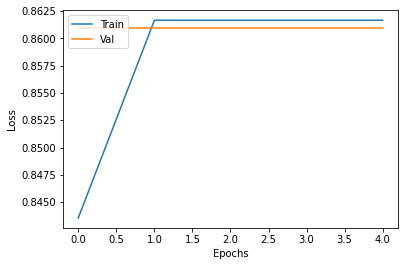

In [93]:
#Accuracy Graph
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.legend(['Train','Val'],loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.show()

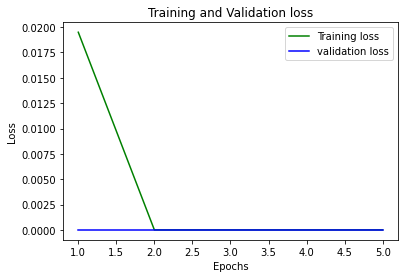

In [96]:
#Loss Graph
%matplotlib inline
import matplotlib.pyplot as plt
loss_train = model1.history['loss']
loss_val = model1.history['val_loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Keras's fit() does not return the model but it returns a History object that contain 
#per-epoch loss and metrics. The code pattern you are using will simply not work with Keras.